In [45]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/miniconda3/envs/zoonosis/lib/python311.zip',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/lib-dynload',
 '',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learnin

In [46]:
!pip install seaborn==0.13.0


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [47]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pathlib import Path
import textwrap
from sklearn.metrics import roc_curve, accuracy_score, f1_score, auc, precision_recall_curve, precision_score, recall_score
from statistics import mean
from src.utils import utils, evaluation_utils, visualization_utils
from matplotlib.ticker import MultipleLocator

In [48]:
dataset_file_path = os.path.join(os.getcwd(), "..","..", "..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_idv.csv")
unseen_hosts_file_path = os.path.join(os.getcwd(), "..","..", "..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_idv_unseen_hosts.csv")
seen_hosts_file_path = os.path.join(os.getcwd(), "..","..", "..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_idv_seen_hosts.csv")

In [49]:
def compute_class_distribution(df, label_col, n, idv_seen_hosts, format=False):
    labels_counts = df[label_col].value_counts()
    print(labels_counts)
    labels_counts = labels_counts / n * 100
    labels_counts = labels_counts.to_dict()
    if format:
        labels_counts = {k: f"{k}\n(n={int(v/100*n)}, {v:.3f}%)" for k, v, in labels_counts.items()}
        
        for k, v in labels_counts.items():
            if k in idv_seen_hosts:
                labels_counts[k] = "*" + v
    return labels_counts

In [50]:
dataset_df = pd.read_csv(dataset_file_path)

In [51]:
idv_seen_hosts = set(pd.read_csv(seen_hosts_file_path)["virus_host_name"].unique())
idv_unseen_hosts = set(pd.read_csv(unseen_hosts_file_path)["virus_host_name"].unique())

In [52]:
metadata_formatted = compute_class_distribution(dataset_df, "virus_host_name", n=220068, idv_seen_hosts=idv_seen_hosts, format=True)
metadata_formatted

virus_host_name
Homo sapiens                          218631
Macaca mulatta                           849
Felis catus                              143
Cercocebus atys                          122
Puma concolor                             24
Macaca nemestrina                         23
Mandrillus sphinx                         23
Mandrillus leucophaeus                    20
Cercopithecus nictitans                   19
Cercopithecus solatus                     17
Cercocebus torquatus                      16
Cercopithecus aethiops                    14
Colobus guereza                           13
Cercopithecus cephus                      13
Chlorocebus sabaeus                       13
Cercopithecus neglectus                   12
Panthera leo                              12
Chlorocebus tantalus                      10
Cercopithecus mona                        10
Felis silvestris catus                     9
Cercopithecus lhoesti                      8
Chlorocebus pygerythrus                

{'Homo sapiens': '*Homo sapiens\n(n=218631, 99.347%)',
 'Macaca mulatta': '*Macaca mulatta\n(n=849, 0.386%)',
 'Felis catus': '*Felis catus\n(n=143, 0.065%)',
 'Cercocebus atys': 'Cercocebus atys\n(n=122, 0.055%)',
 'Puma concolor': 'Puma concolor\n(n=24, 0.011%)',
 'Macaca nemestrina': 'Macaca nemestrina\n(n=23, 0.010%)',
 'Mandrillus sphinx': '*Mandrillus sphinx\n(n=23, 0.010%)',
 'Mandrillus leucophaeus': 'Mandrillus leucophaeus\n(n=20, 0.009%)',
 'Cercopithecus nictitans': 'Cercopithecus nictitans\n(n=19, 0.009%)',
 'Cercopithecus solatus': 'Cercopithecus solatus\n(n=17, 0.008%)',
 'Cercocebus torquatus': 'Cercocebus torquatus\n(n=16, 0.007%)',
 'Cercopithecus aethiops': 'Cercopithecus aethiops\n(n=14, 0.006%)',
 'Colobus guereza': 'Colobus guereza\n(n=13, 0.006%)',
 'Cercopithecus cephus': 'Cercopithecus cephus\n(n=13, 0.006%)',
 'Chlorocebus sabaeus': 'Chlorocebus sabaeus\n(n=13, 0.006%)',
 'Cercopithecus neglectus': 'Cercopithecus neglectus\n(n=12, 0.005%)',
 'Panthera leo': 'Pa

In [53]:
metadata_unformatted = compute_class_distribution(dataset_df, "virus_host_name", n=220068, idv_seen_hosts=idv_seen_hosts, format=False)
metadata_unformatted

virus_host_name
Homo sapiens                          218631
Macaca mulatta                           849
Felis catus                              143
Cercocebus atys                          122
Puma concolor                             24
Macaca nemestrina                         23
Mandrillus sphinx                         23
Mandrillus leucophaeus                    20
Cercopithecus nictitans                   19
Cercopithecus solatus                     17
Cercocebus torquatus                      16
Cercopithecus aethiops                    14
Colobus guereza                           13
Cercopithecus cephus                      13
Chlorocebus sabaeus                       13
Cercopithecus neglectus                   12
Panthera leo                              12
Chlorocebus tantalus                      10
Cercopithecus mona                        10
Felis silvestris catus                     9
Cercopithecus lhoesti                      8
Chlorocebus pygerythrus                

{'Homo sapiens': 99.34702001199629,
 'Macaca mulatta': 0.3857898467746333,
 'Felis catus': 0.0649799152989076,
 'Cercocebus atys': 0.05543741025501209,
 'Puma concolor': 0.010905720050166313,
 'Macaca nemestrina': 0.01045131504807605,
 'Mandrillus sphinx': 0.01045131504807605,
 'Mandrillus leucophaeus': 0.009088100041805259,
 'Cercopithecus nictitans': 0.008633695039714997,
 'Cercopithecus solatus': 0.007724885035534471,
 'Cercocebus torquatus': 0.0072704800334442085,
 'Cercopithecus aethiops': 0.0063616700292636824,
 'Colobus guereza': 0.005907265027173419,
 'Cercopithecus cephus': 0.005907265027173419,
 'Chlorocebus sabaeus': 0.005907265027173419,
 'Cercopithecus neglectus': 0.005452860025083156,
 'Panthera leo': 0.005452860025083156,
 'Chlorocebus tantalus': 0.0045440500209026295,
 'Cercopithecus mona': 0.0045440500209026295,
 'Felis silvestris catus': 0.004089645018812368,
 'Cercopithecus lhoesti': 0.0036352400167221043,
 'Chlorocebus pygerythrus': 0.0031808350146318412,
 'Cercopit

In [54]:
metadata_formatted_reverse = {v: k for k, v in metadata_formatted.items()}
metadata_formatted_reverse

{'*Homo sapiens\n(n=218631, 99.347%)': 'Homo sapiens',
 '*Macaca mulatta\n(n=849, 0.386%)': 'Macaca mulatta',
 '*Felis catus\n(n=143, 0.065%)': 'Felis catus',
 'Cercocebus atys\n(n=122, 0.055%)': 'Cercocebus atys',
 'Puma concolor\n(n=24, 0.011%)': 'Puma concolor',
 'Macaca nemestrina\n(n=23, 0.010%)': 'Macaca nemestrina',
 '*Mandrillus sphinx\n(n=23, 0.010%)': 'Mandrillus sphinx',
 'Mandrillus leucophaeus\n(n=20, 0.009%)': 'Mandrillus leucophaeus',
 'Cercopithecus nictitans\n(n=19, 0.009%)': 'Cercopithecus nictitans',
 'Cercopithecus solatus\n(n=17, 0.008%)': 'Cercopithecus solatus',
 'Cercocebus torquatus\n(n=16, 0.007%)': 'Cercocebus torquatus',
 'Cercopithecus aethiops\n(n=14, 0.006%)': 'Cercopithecus aethiops',
 'Colobus guereza\n(n=13, 0.006%)': 'Colobus guereza',
 'Cercopithecus cephus\n(n=13, 0.006%)': 'Cercopithecus cephus',
 'Chlorocebus sabaeus\n(n=13, 0.006%)': 'Chlorocebus sabaeus',
 'Cercopithecus neglectus\n(n=12, 0.005%)': 'Cercopithecus neglectus',
 'Panthera leo\n(n=1

In [55]:
classes = list(metadata_unformatted.keys())
classes

['Homo sapiens',
 'Macaca mulatta',
 'Felis catus',
 'Cercocebus atys',
 'Puma concolor',
 'Macaca nemestrina',
 'Mandrillus sphinx',
 'Mandrillus leucophaeus',
 'Cercopithecus nictitans',
 'Cercopithecus solatus',
 'Cercocebus torquatus',
 'Cercopithecus aethiops',
 'Colobus guereza',
 'Cercopithecus cephus',
 'Chlorocebus sabaeus',
 'Cercopithecus neglectus',
 'Panthera leo',
 'Chlorocebus tantalus',
 'Cercopithecus mona',
 'Felis silvestris catus',
 'Cercopithecus lhoesti',
 'Chlorocebus pygerythrus',
 'Cercopithecus mitis',
 'Macaca fascicularis',
 'Felis domesticus',
 'Macaca arctoides',
 'Semnopithecus entellus',
 'Cercopithecus erythrotis',
 'Cercopithecus ascanius',
 'Bos taurus',
 'Miopithecus ogouensis',
 'Cercocebus torquatus atys',
 'Cercopithecus aethiops pygerythrus',
 'Lynx rufus',
 'Piliocolobus badius',
 'Piliocolobus tephrosceles',
 'Panthera pardus',
 'Papio ursinus',
 'Otocolobus manul',
 'Procolobus verus']

In [56]:
# filter the classes to include the classes in output


In [57]:
classes_order = {k:i for i, k in enumerate(classes)}
class_formatted_order = {val: classes_order[key] for key, val in metadata_formatted.items()}
print(classes_order)
print(class_formatted_order)

{'Homo sapiens': 0, 'Macaca mulatta': 1, 'Felis catus': 2, 'Cercocebus atys': 3, 'Puma concolor': 4, 'Macaca nemestrina': 5, 'Mandrillus sphinx': 6, 'Mandrillus leucophaeus': 7, 'Cercopithecus nictitans': 8, 'Cercopithecus solatus': 9, 'Cercocebus torquatus': 10, 'Cercopithecus aethiops': 11, 'Colobus guereza': 12, 'Cercopithecus cephus': 13, 'Chlorocebus sabaeus': 14, 'Cercopithecus neglectus': 15, 'Panthera leo': 16, 'Chlorocebus tantalus': 17, 'Cercopithecus mona': 18, 'Felis silvestris catus': 19, 'Cercopithecus lhoesti': 20, 'Chlorocebus pygerythrus': 21, 'Cercopithecus mitis': 22, 'Macaca fascicularis': 23, 'Felis domesticus': 24, 'Macaca arctoides': 25, 'Semnopithecus entellus': 26, 'Cercopithecus erythrotis': 27, 'Cercopithecus ascanius': 28, 'Bos taurus': 29, 'Miopithecus ogouensis': 30, 'Cercocebus torquatus atys': 31, 'Cercopithecus aethiops pygerythrus': 32, 'Lynx rufus': 33, 'Piliocolobus badius': 34, 'Piliocolobus tephrosceles': 35, 'Panthera pardus': 36, 'Papio ursinus':

In [58]:
dataset_df["virus_host_name"].nunique()

40

In [59]:
import math

def get_uniformly_divided_position_bins(positions, n_bins):
    bin_width = math.floor(len(positions)/n_bins)
    bins = []
    start = 0
    for i in range(n_bins):
        end = start + bin_width
        bins.append(positions[start:end])
        start = end
    return bins

In [60]:
def get_rank(row, all_output_labels):
    y_true = row["y_true"]
    ranks = row[all_output_labels].rank(ascending=False, method="min")
    return ranks[y_true]

def plot_rank_distribution(df):
    plt.clf()
    plt.figure(figsize=(10, 10))
    sns.set_theme()
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    plt.rcParams.update({'font.size': 16})
    ax = sns.displot(df, x="y_true_rank", hue="y_true", kind="kde", fill=True)
    ax.set_xlabel("Rank based on Probability", fontsize=20)
    sns.move_legend(ax, "upper right", bbox_to_anchor=(1.3, 1))

   # plt.legend(title="Classes", loc="upper right", fontsize=10)
    plt.show()

        
def plot_probability_distribution(class_prob_df, random_predictor, idv_seen_hosts, idv_unseen_hosts, output_file_path=None):
    n = len(rank_bins)
    # color_palette = sns.color_palette("ch:s=.25,rot=-.25_r", n_colors=n)
    color_palette = sns.color_palette("YlOrBr_r", n_colors=n)
    
    plt.clf()
    fig, ax = plt.subplots(1, 2, figsize=(20, 20), sharey=True)
    sns.set_theme(style="whitegrid")
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams['hatch.linewidth'] = 3
    plt.rcParams['hatch.color'] = "k" 
    plt.rcParams.update({'font.size': 20})
    class_prob_df.sort_values(by="class", key=lambda x: x.map(class_formatted_order), inplace=True)
    class_prob_df_hosts = list(class_prob_df["class"].unique())
    n_class_prob_df_hosts = len(class_prob_df_hosts)
    print(f"class_prob_df_hosts = {class_prob_df_hosts}")
    print(f"number of class_prob_df_hosts = {len(class_prob_df_hosts)}")
    
    sns.stripplot(data=class_prob_df, x="probability", y="class", hue="y_true_rank_bin",
                  palette=color_palette, hue_order=rank_bins, ax=ax[0], legend=False, size=10,
                 linewidth=.3)
    ax[0].axvline(random_predictor, color="gray", linestyle="--", linewidth=2)
    ax[0].set_ylabel("", fontsize=20)
    ax[0].set_xlabel("True Class Probability", fontsize=22)
    ax[0].set_xlim(0, 1)

    barplot_df = pd.crosstab(class_prob_df["class"], class_prob_df["y_true_rank_bin"], normalize="index")[rank_bins].cumsum(axis=1).stack().reset_index().rename(columns={0:"proportion"})
    barplot_df["percent"] = barplot_df["proportion"]*100

    sns.barplot(data=barplot_df, x="percent", y="class", hue="y_true_rank_bin", dodge=False, palette=color_palette[::-1], hue_order=rank_bins[::-1], ax=ax[1], edgecolor="k")
    ax[1].set_xlabel("Rank Distribution (%)", fontsize=22)
    
    # get indices of seen hosts
#     seen_host_indices = []
#     for seen_host in idv_seen_hosts:
#         seen_host_indices.append(class_prob_df_hosts.index(metadata_formatted[seen_host]))
        
#     print(f"Number of patches = {len(ax[1].patches)}")
    
#     for i in seen_host_indices:
#         for j in range(0, n):
#             ax[1].patches[j*n_class_prob_df_hosts + i].set_hatch("//")
#             #ax[1].patches[j*n_class_prob_df_hosts + i].set_facecolor(color_palette_seen[j])


    plt.legend(title="Prediction", loc="upper right", fontsize=22)
    #sns.move_legend(ax[0], "lower center", ncol=6, title=None, bbox_to_anchor=(.9, 1), fontsize=16)
    sns.move_legend(ax[1], "lower center", ncol=6, title=None, bbox_to_anchor=(-0.08, 1), fontsize=16)
    plt.subplots_adjust(wspace = 0.05)
    if output_file_path:
        plt.savefig(output_file_path, bbox_inches="tight")
    plt.show()
    
    
def analyze_all_way_fsl_results(output_file_path, auprc_file_path):
    output_auprc_df = pd.read_csv(auprc_file_path, index_col=0)
    output_df = pd.read_csv(output_file_path, index_col=0)
    print(f"Number of unique classes in output_df = {output_auprc_df['class'].nunique()}")
    
    all_output_labels = list(output_df.columns)
    all_output_labels.remove("itr")
    all_output_labels.remove("y_true")
    print(f"Number of unique labels in output_df = {len(all_output_labels)}")
    
    sub_df = output_df[output_df["itr"] == 0]
    sub_df.drop(columns="itr", inplace=True)
    sub_df["y_true_rank"] = sub_df.apply(lambda x: get_rank(x, all_output_labels), axis=1)
    sub_df["y_true_rank_bin"] = sub_df.apply(get_rank_bin, axis=1)
    
    #plot_rank_distribution(sub_df.replace({"y_true": metadata_formatted}))
    
    print(f"Number of Unseen IDV hosts  =  {len(idv_unseen_hosts)}")
    print(f"Number of Seen IDV hosts  =  {len(idv_seen_hosts)}")
    
    output_df["y_pred"] = output_df[all_output_labels].idxmax(axis=1)
        
    classwise_prob_dfs = []
    
    for label in all_output_labels:
        class_prob_df = sub_df[[label, "y_true", "y_true_rank_bin", "y_true_rank"]][sub_df["y_true"] == label]
        class_prob_df = class_prob_df.rename(columns={label: "probability", "y_true": "class"})
        classwise_prob_dfs.append(class_prob_df)

    class_prob_df = pd.concat(classwise_prob_dfs)
    class_prob_df.replace({"class": metadata_formatted}, inplace=True)
    
    #plot_probability_distribution(class_prob_df, 1/len(all_output_labels))
    return class_prob_df, 1/len(all_output_labels), idv_seen_hosts, idv_unseen_hosts


### Unseen hosts

#### 23-way

In [61]:
#output_file_path =  os.path.join(os.getcwd(), "..","..", "..", "output/raw/uniref90_embl_vertebrates_idv_unseen_hosts/20241010/host_multi/few_shot_learning/fsl_tr_w5s3q10_te_walls3q-1_tsk1e1b16itr5_split70-10-20-gpu2_hybrid-attention_sl256st64vs30_ae_bn_fnn_2l_d1024_lr1e-4_output.csv")
#auprc_file_path =  os.path.join(os.getcwd(), "..","..", "..", "output/raw/uniref90_embl_vertebrates_idv_unseen_hosts/20241010/host_multi/few_shot_learning/fsl_tr_w5s3q10_te_walls3q-1_tsk1e1b16itr5_split70-10-20-gpu2_hybrid-attention_sl256st64vs30_ae_bn_fnn_2l_d1024_lr1e-4_classwise_auprc.csv")
output_file_path =  os.path.join(os.getcwd(), "..","..", "..", "output/raw/uniref90_embl_vertebrates_idv_all_hosts/20241022/host_multi/few_shot_learning/fsl_tr_w3s5q10_te_walls5q-1_tsk1e1b16itr5_split70-10-20-gpu2_hybrid-attention_sl256st64vs30_ae_bn_fnn_2l_d1024_lr1e-4_output.csv")
auprc_file_path =  os.path.join(os.getcwd(), "..","..", "..", "output/raw/uniref90_embl_vertebrates_idv_all_hosts/20241022/host_multi/few_shot_learning/fsl_tr_w3s5q10_te_walls5q-1_tsk1e1b16itr5_split70-10-20-gpu2_hybrid-attention_sl256st64vs30_ae_bn_fnn_2l_d1024_lr1e-4_classwise_auprc.csv")

In [62]:
def get_rank_bin(row):
    rank = row["y_true_rank"]
    if rank == 1:
        return "Top rank"
    elif rank <= 3:
        return "Top 3 ranks"
    elif rank <= 5:
        return "Top 5 ranks"
    elif rank <= 10:
        return "Top 10 ranks"
    else:
        return "Rank > 10"
    
rank_bins = ["Top rank", "Top 3 ranks", "Top 5 ranks", "Top 10 ranks", "Rank > 10"]
class_prob_df_23way, random_predictor_23way, idv_seen_hosts, idv_unseen_hosts = analyze_all_way_fsl_results(output_file_path, auprc_file_path)

Number of unique classes in output_df = 23
Number of unique labels in output_df = 23


/tmp/ipykernel_3636389/512126311.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(columns="itr", inplace=True)
/tmp/ipykernel_3636389/512126311.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["y_true_rank"] = sub_df.apply(lambda x: get_rank(x, all_output_labels), axis=1)
/tmp/ipykernel_3636389/512126311.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Number of Unseen IDV hosts  =  32
Number of Seen IDV hosts  =  8


In [18]:
def plot_probability_distribution_vertical(class_prob_df, random_predictor, idv_seen_hosts, idv_unseen_hosts, output_file_path=None):
    n = len(rank_bins)
    # color_palette = sns.color_palette("ch:s=.25,rot=-.25_r", n_colors=n)
    color_palette = sns.color_palette("YlOrBr_r", n_colors=n)
    
    plt.clf()
    fig, ax = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
    sns.set_theme(style="whitegrid")
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams['hatch.linewidth'] = 3
    plt.rcParams['hatch.color'] = "k" 
    plt.rcParams.update({'font.size': 18})
    class_prob_df.sort_values(by="class", key=lambda x: x.map(class_formatted_order), inplace=True)
    class_prob_df_hosts = list(class_prob_df["class"].unique())
    n_class_prob_df_hosts = len(class_prob_df_hosts)
    print(f"class_prob_df_hosts = {class_prob_df_hosts}")
    print(f"number of class_prob_df_hosts = {len(class_prob_df_hosts)}")
    
    sns.stripplot(data=class_prob_df, y="probability", x="class", hue="y_true_rank_bin",
                  palette=color_palette, hue_order=rank_bins, ax=ax[1], legend=False, size=10,
                 linewidth=.3)
    ax[1].axhline(random_predictor, color="gray", linestyle="--", linewidth=2)
    ax[1].set_xlabel("", fontsize=0)
    ax[1].set_ylabel("True Class Probability", fontsize=18)
    ax[1].set_ylim(0, 1)

    barplot_df = pd.crosstab(class_prob_df["class"], class_prob_df["y_true_rank_bin"], normalize="index")[rank_bins].cumsum(axis=1).stack().reset_index().rename(columns={0:"proportion"})
    barplot_df["percent"] = barplot_df["proportion"]*100

    sns.barplot(data=barplot_df, y="percent", x="class", hue="y_true_rank_bin", dodge=False, palette=color_palette[::-1], hue_order=rank_bins[::-1], ax=ax[0], edgecolor="k", width=0.4)
    ax[0].set_ylabel("Rank Distribution (%)", fontsize=18)
    
    # get indices of seen hosts
#     seen_host_indices = []
#     for seen_host in idv_seen_hosts:
#         seen_host_indices.append(class_prob_df_hosts.index(metadata_formatted[seen_host]))
        
#     print(f"Number of patches = {len(ax[1].patches)}")
    
#     for i in seen_host_indices:
#         for j in range(0, n):
#             ax[1].patches[j*n_class_prob_df_hosts + i].set_hatch("//")
#             #ax[1].patches[j*n_class_prob_df_hosts + i].set_facecolor(color_palette_seen[j])


    #plt.legend(title="Prediction", loc="upper right", fontsize=18)
    #sns.move_legend(ax[0], "lower center", ncol=6, title=None, bbox_to_anchor=(.9, 1), fontsize=16)
    
    sns.move_legend(
        ax[0], "lower center",
        bbox_to_anchor=(0.5, 1.02), ncol=5, title=None, frameon=True, fontsize=18
    )
    #sns.move_legend(ax[1], "lower center", ncol=6, title=None, bbox_to_anchor=(-0.08, 1), fontsize=16)
    plt.subplots_adjust(hspace = 0.05)
    plt.xticks(rotation=90)
    if output_file_path:
        plt.savefig(output_file_path, bbox_inches="tight")
    plt.show()

class_prob_df_hosts = ['*Homo sapiens\n(n=218631, 99.347%)', '*Macaca mulatta\n(n=849, 0.386%)', '*Felis catus\n(n=143, 0.065%)', 'Cercocebus atys\n(n=122, 0.055%)', 'Puma concolor\n(n=24, 0.011%)', 'Macaca nemestrina\n(n=23, 0.010%)', '*Mandrillus sphinx\n(n=23, 0.010%)', 'Mandrillus leucophaeus\n(n=20, 0.009%)', 'Cercopithecus nictitans\n(n=19, 0.009%)', 'Cercopithecus solatus\n(n=17, 0.008%)', 'Cercocebus torquatus\n(n=16, 0.007%)', 'Cercopithecus aethiops\n(n=14, 0.006%)', 'Colobus guereza\n(n=13, 0.006%)', 'Cercopithecus cephus\n(n=13, 0.006%)', 'Chlorocebus sabaeus\n(n=13, 0.006%)', 'Cercopithecus neglectus\n(n=12, 0.005%)', 'Panthera leo\n(n=12, 0.005%)', 'Chlorocebus tantalus\n(n=10, 0.005%)', 'Cercopithecus mona\n(n=10, 0.005%)', 'Felis silvestris catus\n(n=9, 0.004%)', 'Cercopithecus lhoesti\n(n=8, 0.004%)', 'Chlorocebus pygerythrus\n(n=7, 0.003%)', 'Cercopithecus mitis\n(n=6, 0.003%)']
number of class_prob_df_hosts = 23


/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

<Figure size 640x480 with 0 Axes>

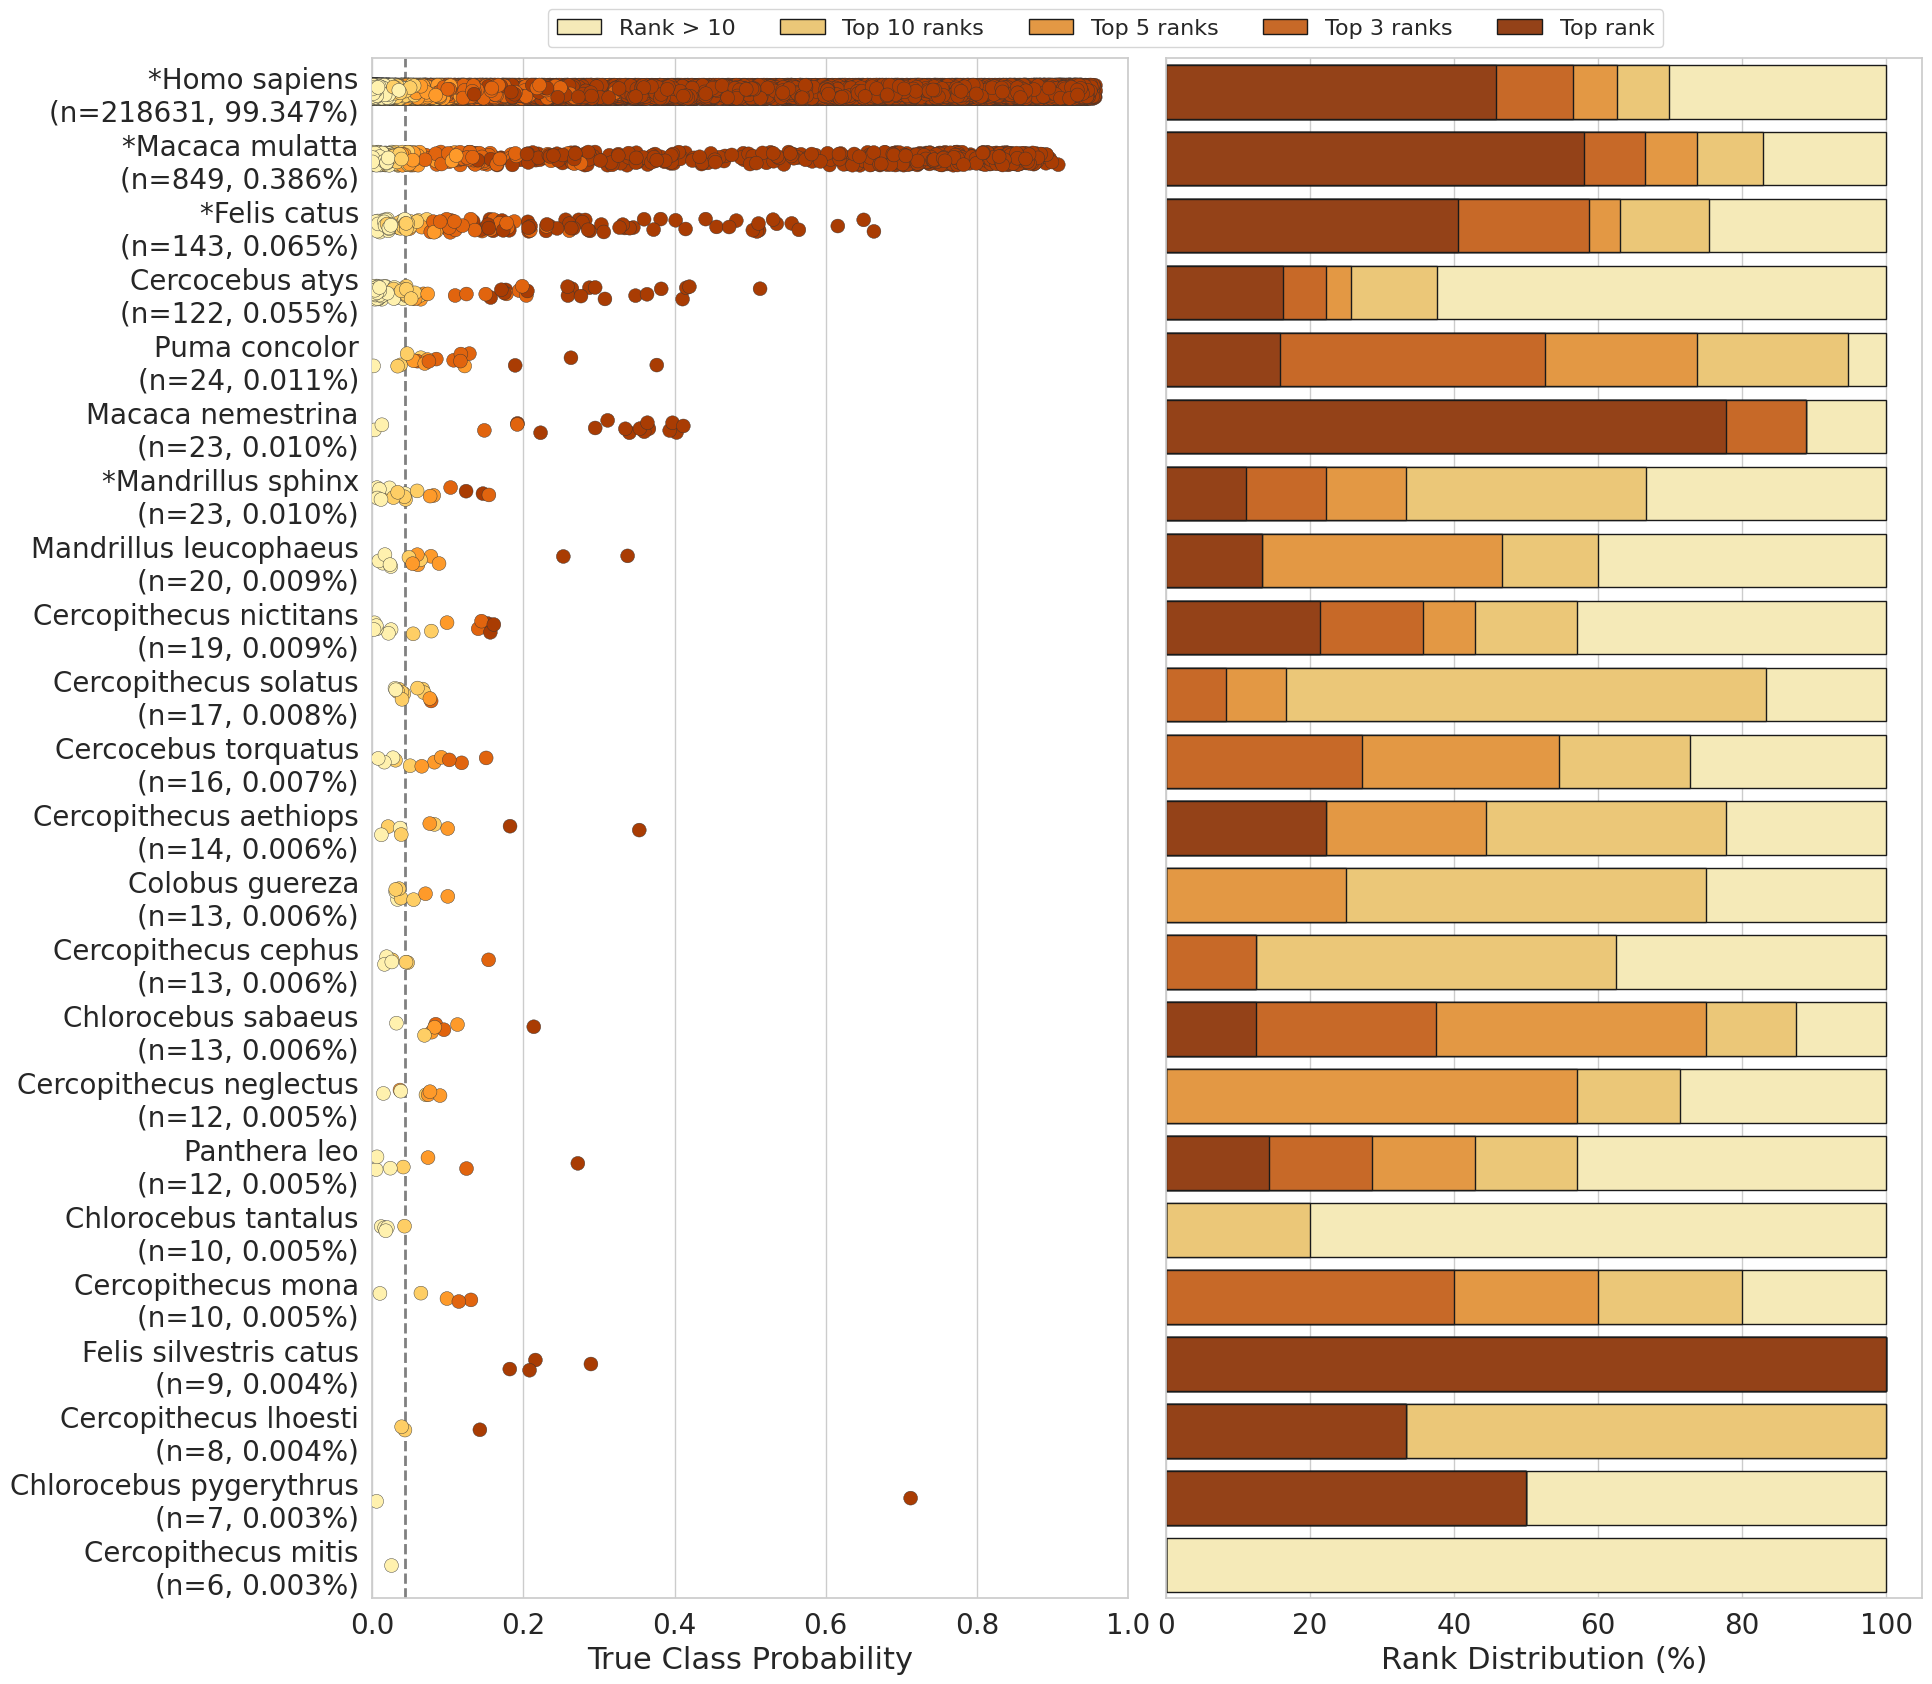

In [20]:
plot_probability_distribution(class_prob_df_23way, random_predictor_23way, idv_seen_hosts, idv_unseen_hosts, output_file_path = os.path.join(os.getcwd(), "..", "..", "..", f"output/visualization/temp_new/idv_fsl_23way_landscape.pdf"))

In [63]:
def plot_probability_distribution_new(class_prob_df, output_file_path=None):
    n = len(rank_bins)
    # color_palette = sns.color_palette("ch:s=.25,rot=-.25_r", n_colors=n)
    color_palette = sns.color_palette("YlOrBr_r", n_colors=n)
    plt.clf()
    fig, ax = plt.subplots(1, 2, figsize=(27, 6), gridspec_kw={"width_ratios": [2.2, 1]})
    sns.set_theme(style="whitegrid")
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams.update({'font.size': 20})
    class_prob_df.sort_values(by="class", key=lambda x: x.map(class_formatted_order), inplace=True)
    class_prob_df_hosts = list(class_prob_df["class"].unique())
    n_class_prob_df_hosts = len(class_prob_df_hosts)
    print(f"class_prob_df_hosts = {class_prob_df_hosts}")
    print(f"number of class_prob_df_hosts = {len(class_prob_df_hosts)}")
    
    sns.stripplot(data=class_prob_df, y="probability", x="class", hue="y_true_rank_bin",
                  palette=color_palette, hue_order=rank_bins, ax=ax[0], size=10,
                 linewidth=.3)
    ax[0].axhline(random_predictor_23way, color="gray", linestyle="--", linewidth=3)
    ax[0].set_xlabel("", fontsize=0)
    ax[0].set_ylabel("True Class Probability", fontsize=20)
    ax[0].set_ylim(0, 1)
    ax[0].tick_params(labelrotation=90)
    
    barplot_df = pd.crosstab(class_prob_df["class"], class_prob_df["y_true_rank_bin"], normalize="index")[rank_bins].cumsum(axis=1).stack().reset_index().rename(columns={0:"proportion"})
    barplot_df["percent"] = barplot_df["proportion"]*100
    
    lineplot_dfs = []
    for rank in rank_bins:
        if rank == "Rank > 10":
            continue
        curr_df = barplot_df[barplot_df["y_true_rank_bin"] == rank].sort_values("percent").reset_index(drop=True).reset_index()
        #curr_df["index"] += 1
        lineplot_dfs.append(curr_df)
    lineplot_df = pd.concat(lineplot_dfs)
    #lineplot_df = barplot_df[["class", "y_true_rank_bin", "percent"]].groupby(["y_true_rank_bin", "percent"]).count().reset_index()
    sns.lineplot(data=lineplot_df, y="percent", x="index", hue="y_true_rank_bin", palette=color_palette, ax=ax[1], legend=False, linewidth=3)
    ax[1].set_xlabel("Cumulative Number \n of Classes", fontsize=20)
    ax[1].set_ylabel("Correct Predictions (%)", fontsize=20)
    ax[1].xaxis.set_major_locator(MultipleLocator(2))
    ax[1].yaxis.set_major_locator(MultipleLocator(10))
    ax[1].axhline(50, color="gray", linestyle="--", linewidth=3)
    ax[1].axvline(19, color="gray", linestyle="--", linewidth=3)
    #sns.move_legend(ax[1], "lower center", ncol=6, title=None, bbox_to_anchor=(-0.08, 1), fontsize=16)
    plt.subplots_adjust(wspace = 0.12)
    ax[0].legend(fontsize=20)
    sns.move_legend(
        ax[0], "lower center",
        bbox_to_anchor=(.75, .98), ncol=5, title="True class in", frameon=False, title_fontsize=20,
        fontsize=20, markerscale=2
    )
    plt.text(x=-62, y=102, s="A", fontsize=24, color="black")
    plt.text(x=-5, y=102, s="B", fontsize=24, color="black")
    
    plt.savefig(output_file_path, bbox_inches="tight")
    plt.show()


class_prob_df_hosts = ['*Homo sapiens\n(n=218631, 99.347%)', '*Macaca mulatta\n(n=849, 0.386%)', '*Felis catus\n(n=143, 0.065%)', 'Cercocebus atys\n(n=122, 0.055%)', 'Puma concolor\n(n=24, 0.011%)', 'Macaca nemestrina\n(n=23, 0.010%)', '*Mandrillus sphinx\n(n=23, 0.010%)', 'Mandrillus leucophaeus\n(n=20, 0.009%)', 'Cercopithecus nictitans\n(n=19, 0.009%)', 'Cercopithecus solatus\n(n=17, 0.008%)', 'Cercocebus torquatus\n(n=16, 0.007%)', 'Cercopithecus aethiops\n(n=14, 0.006%)', 'Colobus guereza\n(n=13, 0.006%)', 'Cercopithecus cephus\n(n=13, 0.006%)', 'Chlorocebus sabaeus\n(n=13, 0.006%)', 'Cercopithecus neglectus\n(n=12, 0.005%)', 'Panthera leo\n(n=12, 0.005%)', 'Chlorocebus tantalus\n(n=10, 0.005%)', 'Cercopithecus mona\n(n=10, 0.005%)', 'Felis silvestris catus\n(n=9, 0.004%)', 'Cercopithecus lhoesti\n(n=8, 0.004%)', 'Chlorocebus pygerythrus\n(n=7, 0.003%)', 'Cercopithecus mitis\n(n=6, 0.003%)']
number of class_prob_df_hosts = 23


/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/tmp/ipykernel_3636389/552089901.py:38: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(data=lineplot_df, y="percent", x="index", hue="y_true_rank_bin", palette=color_palette, ax=ax[1], legend=False, linewidth=3)
/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/blessyantony/miniconda3/envs/zoonosis/lib/

<Figure size 640x480 with 0 Axes>

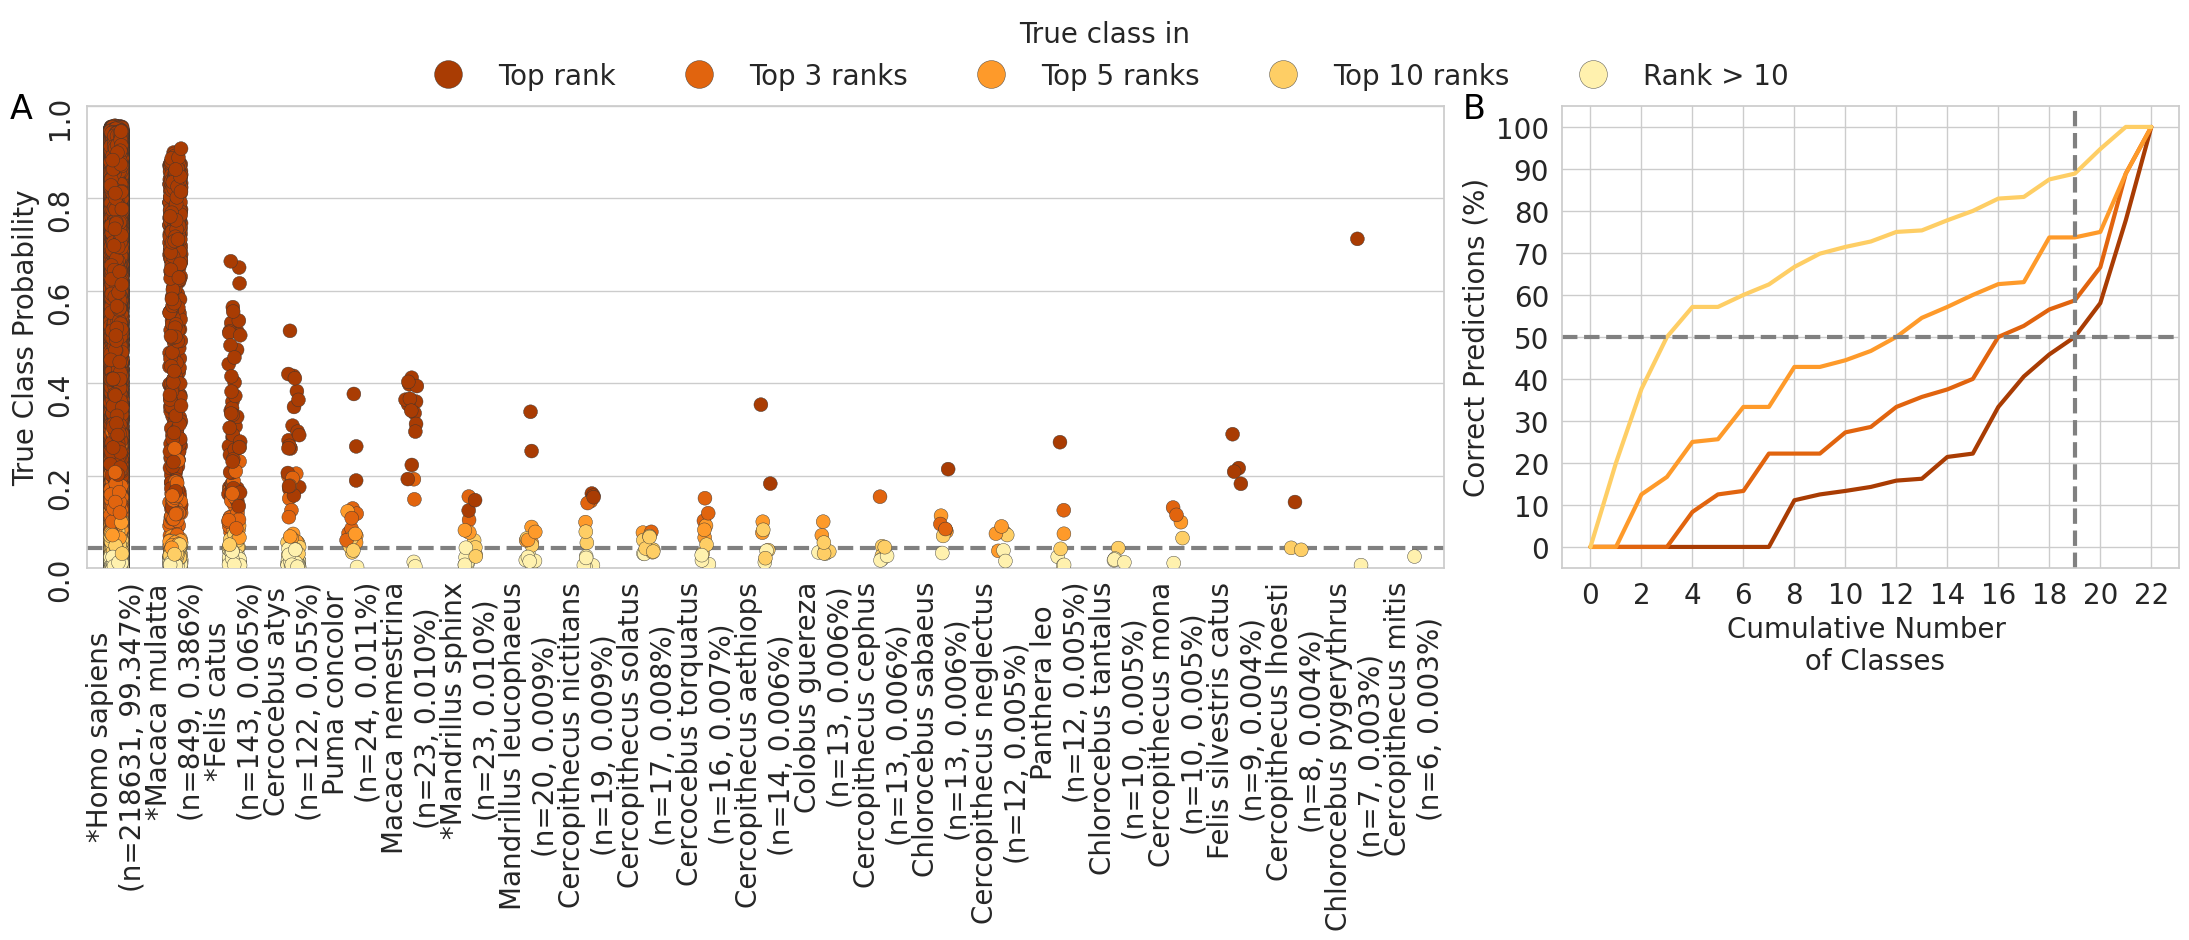

In [64]:
plot_probability_distribution_new(class_prob_df_23way, output_file_path=os.path.join(os.getcwd(), "..", "..", "..", f"output/visualization/temp_new/idv_fsl_23way_stripplot_lineplot.png"))

In [215]:
#lineplot_df[lineplot_df["index"] == 19]
print(lineplot_df[(lineplot_df["percent"] >= 50) & (lineplot_df["y_true_rank_bin"] == "Top 10 ranks")].shape[0])


20


,index,class,y_true_rank_bin,proportion,percent
3,3,"Chlorocebus pygerythrus\n(n=7, 0.003%)",Top 10 ranks,0.500000,50.000000
4,4,"Panthera leo\n(n=12, 0.005%)",Top 10 ranks,0.571429,57.142857
5,5,"Cercopithecus nictitans\n(n=19, 0.009%)",Top 10 ranks,0.571429,57.142857
6,6,"Mandrillus leucophaeus\n(n=20, 0.009%)",Top 10 ranks,0.600000,60.000000
7,7,"Cercopithecus cephus\n(n=13, 0.006%)",Top 10 ranks,0.625000,62.500000
8,8,"*Mandrillus sphinx\n(n=23, 0.010%)",Top 10 ranks,0.666667,66.666667
9,9,"*Homo sapiens\n(n=218631, 99.347%)",Top 10 ranks,0.698316,69.831585
10,10,"Cercopithecus neglectus\n(n=12, 0.005%)",Top 10 ranks,0.714286,71.428571
11,11,"Cercocebus torquatus\n(n=16, 0.007%)",Top 10 ranks,0.727273,72.727273
12,12,"Colobus guereza\n(n=13, 0.006%)",Top 10 ranks,0.750000,75.000000


In [ ]:
plot_probability_distribution_vertical(class_prob_df_23way, output_file_path=os.path.join(os.getcwd(), "..", "..", "..", f"output/visualization/temp_new/idv_fsl_167way_stripplot_lineplot.png"))

class_prob_df_hosts = ['*Homo sapiens\n(n=218631, 99.347%)', '*Macaca mulatta\n(n=849, 0.386%)', '*Felis catus\n(n=143, 0.065%)', 'Cercocebus atys\n(n=122, 0.055%)', 'Puma concolor\n(n=24, 0.011%)', 'Macaca nemestrina\n(n=23, 0.010%)', '*Mandrillus sphinx\n(n=23, 0.010%)', 'Mandrillus leucophaeus\n(n=20, 0.009%)', 'Cercopithecus nictitans\n(n=19, 0.009%)', 'Cercopithecus solatus\n(n=17, 0.008%)', 'Cercocebus torquatus\n(n=16, 0.007%)', 'Cercopithecus aethiops\n(n=14, 0.006%)', 'Colobus guereza\n(n=13, 0.006%)', 'Cercopithecus cephus\n(n=13, 0.006%)', 'Chlorocebus sabaeus\n(n=13, 0.006%)', 'Cercopithecus neglectus\n(n=12, 0.005%)', 'Panthera leo\n(n=12, 0.005%)', 'Chlorocebus tantalus\n(n=10, 0.005%)', 'Cercopithecus mona\n(n=10, 0.005%)', 'Felis silvestris catus\n(n=9, 0.004%)', 'Cercopithecus lhoesti\n(n=8, 0.004%)', 'Chlorocebus pygerythrus\n(n=7, 0.003%)', 'Cercopithecus mitis\n(n=6, 0.003%)']
number of class_prob_df_hosts = 23


/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

<Figure size 640x480 with 0 Axes>

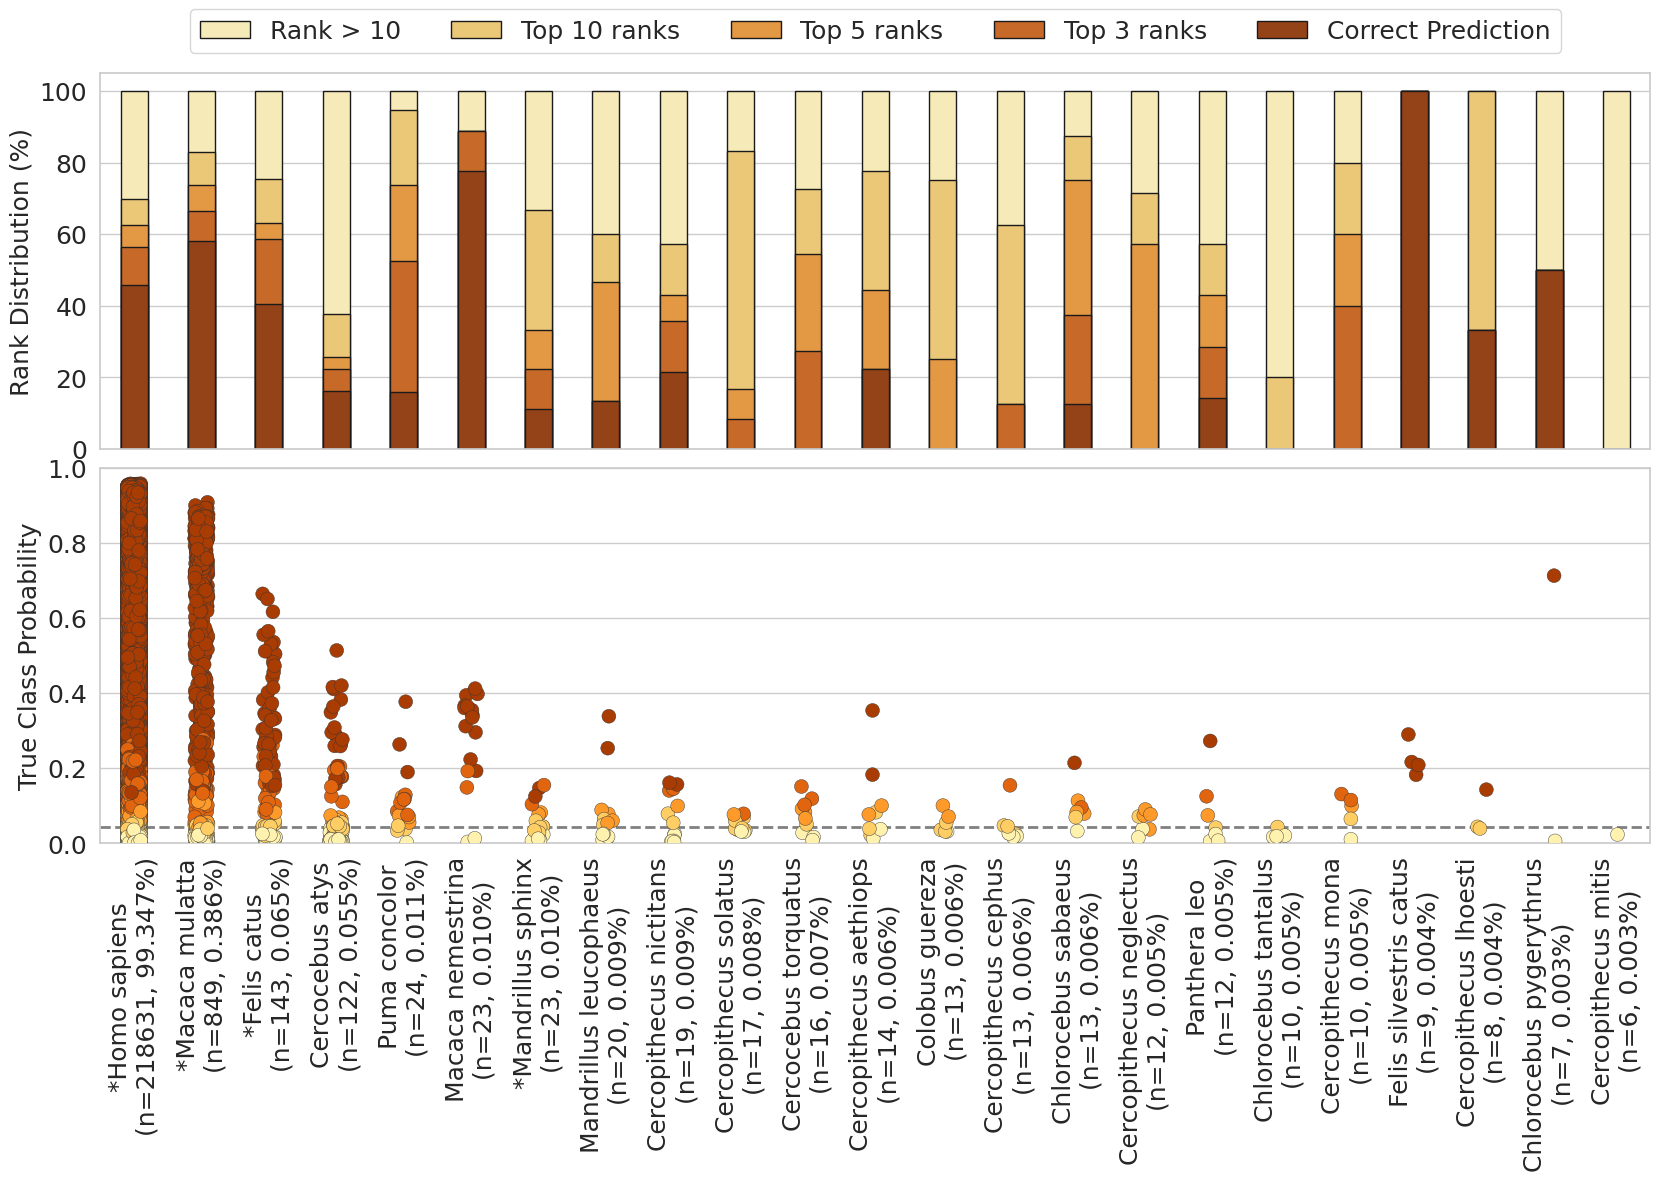

In [24]:
plot_probability_distribution_vertical(class_prob_df_23way, random_predictor_23way, idv_seen_hosts, idv_unseen_hosts, output_file_path = os.path.join(os.getcwd(), "..", "..", "..", f"output/visualization/temp_new/idv_fsl_23way_landscape.pdf"))

In [36]:
class_prob_df = class_prob_df_23way
class_prob_df.sort_values(by="class", key=lambda x: x.map(class_formatted_order), inplace=True)
class_prob_df_hosts = list(class_prob_df["class"].unique())
n_class_prob_df_hosts = len(class_prob_df_hosts)
print(f"class_prob_df_hosts = {class_prob_df_hosts}")
print(f"number of class_prob_df_hosts = {len(class_prob_df_hosts)}")

barplot_df = pd.crosstab(class_prob_df["class"], class_prob_df["y_true_rank_bin"], normalize="index")[rank_bins].cumsum(axis=1).stack().reset_index().rename(columns={0:"proportion"})
barplot_df["percent"] = barplot_df["proportion"]*100
barplot_df[barplot_df["y_true_rank_bin"] == "Correct Prediction"]

class_prob_df_hosts = ['*Homo sapiens\n(n=218631, 99.347%)', '*Macaca mulatta\n(n=849, 0.386%)', '*Felis catus\n(n=143, 0.065%)', 'Cercocebus atys\n(n=122, 0.055%)', 'Puma concolor\n(n=24, 0.011%)', 'Macaca nemestrina\n(n=23, 0.010%)', '*Mandrillus sphinx\n(n=23, 0.010%)', 'Mandrillus leucophaeus\n(n=20, 0.009%)', 'Cercopithecus nictitans\n(n=19, 0.009%)', 'Cercopithecus solatus\n(n=17, 0.008%)', 'Cercocebus torquatus\n(n=16, 0.007%)', 'Cercopithecus aethiops\n(n=14, 0.006%)', 'Colobus guereza\n(n=13, 0.006%)', 'Cercopithecus cephus\n(n=13, 0.006%)', 'Chlorocebus sabaeus\n(n=13, 0.006%)', 'Cercopithecus neglectus\n(n=12, 0.005%)', 'Panthera leo\n(n=12, 0.005%)', 'Chlorocebus tantalus\n(n=10, 0.005%)', 'Cercopithecus mona\n(n=10, 0.005%)', 'Felis silvestris catus\n(n=9, 0.004%)', 'Cercopithecus lhoesti\n(n=8, 0.004%)', 'Chlorocebus pygerythrus\n(n=7, 0.003%)', 'Cercopithecus mitis\n(n=6, 0.003%)']
number of class_prob_df_hosts = 23


,class,y_true_rank_bin,proportion,percent
0,"*Felis catus\n(n=143, 0.065%)",Correct Prediction,0.405797,40.579710
5,"*Homo sapiens\n(n=218631, 99.347%)",Correct Prediction,0.458349,45.834896
10,"*Macaca mulatta\n(n=849, 0.386%)",Correct Prediction,0.580569,58.056872
15,"*Mandrillus sphinx\n(n=23, 0.010%)",Correct Prediction,0.111111,11.111111
20,"Cercocebus atys\n(n=122, 0.055%)",Correct Prediction,0.162393,16.239316
25,"Cercocebus torquatus\n(n=16, 0.007%)",Correct Prediction,0.000000,0.000000
30,"Cercopithecus aethiops\n(n=14, 0.006%)",Correct Prediction,0.222222,22.222222
35,"Cercopithecus cephus\n(n=13, 0.006%)",Correct Prediction,0.000000,0.000000
40,"Cercopithecus lhoesti\n(n=8, 0.004%)",Correct Prediction,0.333333,33.333333
45,"Cercopithecus mitis\n(n=6, 0.003%)",Correct Prediction,0.000000,0.000000


#### 167-way

In [17]:
#output_file_path =  os.path.join(os.getcwd(), "..","..", "..", "output/raw/uniref90_embl_vertebrates_idv_unseen_hosts/20241010/host_multi/few_shot_learning/fsl_tr_w3s5q10_ev_walls5q-1_tsk1e1b16itr5_split70-10-20-gpu2_hybrid-attention_sl256st64vs30_ae_bn_fnn_2l_d1024_lr1e-4_output.csv")
#auprc_file_path =  os.path.join(os.getcwd(), "..","..", "..", "output/raw/uniref90_embl_vertebrates_idv_unseen_hosts/20241010/host_multi/few_shot_learning/fsl_tr_w3s5q10_ev_walls5q-1_tsk1e1b16itr5_split70-10-20-gpu2_hybrid-attention_sl256st64vs30_ae_bn_fnn_2l_d1024_lr1e-4_classwise_auprc.csv")
output_file_path =  os.path.join(os.getcwd(), "..","..", "..", "output/raw/uniref90_embl_vertebrates_idv_all_hosts/20241022/host_multi/few_shot_learning/fsl_tr_w3s5q10_ev_walls5q-1_tsk1e1b16itr5_split70-10-20-gpu2_hybrid-attention_sl256st64vs30_ae_bn_fnn_2l_d1024_lr1e-4_output.csv")
auprc_file_path =  os.path.join(os.getcwd(), "..","..", "..", "output/raw/uniref90_embl_vertebrates_idv_all_hosts/20241022/host_multi/few_shot_learning/fsl_tr_w3s5q10_ev_walls5q-1_tsk1e1b16itr5_split70-10-20-gpu2_hybrid-attention_sl256st64vs30_ae_bn_fnn_2l_d1024_lr1e-4_classwise_auprc.csv")


In [24]:
def get_rank_bin(row):
    rank = row["y_true_rank"]
    if rank == 1:
        return "Top Rank"
    elif rank <= 5:
        return "Top 5 ranks"
    elif rank <= 10:
        return "Top 10 ranks"
    elif rank <= 15:
        return "Top 15 ranks"
    elif rank <= 20:
        return "Top 20 ranks"
    else:
        return "Rank > 20"
    
rank_bins = ["Top Rank", "Top 5 ranks", "Top 10 ranks", "Top 15 ranks", "Top 20 ranks", "Rank > 20"]

In [19]:
class_prob_df_167way, random_predictor, idv_seen_hosts, idv_unseen_hosts = analyze_all_way_fsl_results(output_file_path, auprc_file_path)

Number of unique classes in output_df = 167
Number of unique labels in output_df = 167


/tmp/ipykernel_3636389/512126311.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(columns="itr", inplace=True)
/tmp/ipykernel_3636389/512126311.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["y_true_rank"] = sub_df.apply(lambda x: get_rank(x, all_output_labels), axis=1)
/tmp/ipykernel_3636389/512126311.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Number of Unseen IDV hosts  =  32
Number of Seen IDV hosts  =  8


In [43]:
def plot_probability_distribution_new(class_prob_df, output_file_path=None):
    n = len(rank_bins)
    # color_palette = sns.color_palette("ch:s=.25,rot=-.25_r", n_colors=n)
    color_palette = sns.color_palette("YlOrBr_r", n_colors=n)
    plt.clf()
    fig, ax = plt.subplots(1, 2, figsize=(30, 7), gridspec_kw={"width_ratios": [2.2, 1]})
    sns.set_theme(style="whitegrid")
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams.update({'font.size': 20})
    class_prob_df.sort_values(by="class", key=lambda x: x.map(class_formatted_order), inplace=True)
    class_prob_df_hosts = list(class_prob_df["class"].unique())
    n_class_prob_df_hosts = len(class_prob_df_hosts)
    print(f"class_prob_df_hosts = {class_prob_df_hosts}")
    print(f"number of class_prob_df_hosts = {len(class_prob_df_hosts)}")
    
    sns.stripplot(data=class_prob_df, y="probability", x="class", hue="y_true_rank_bin",
                  palette=color_palette, hue_order=rank_bins, ax=ax[0], size=10,
                 linewidth=.3)
    ax[0].axhline(random_predictor_167way, color="gray", linestyle="--", linewidth=3)
    ax[0].set_xlabel("", fontsize=0)
    ax[0].set_ylabel("True Class Probability", fontsize=20)
    ax[0].set_ylim(0, 1)
    ax[0].tick_params(labelrotation=90)
    
    barplot_df = pd.crosstab(class_prob_df["class"], class_prob_df["y_true_rank_bin"], normalize="index")[rank_bins].cumsum(axis=1).stack().reset_index().rename(columns={0:"proportion"})
    barplot_df["percent"] = barplot_df["proportion"]*100
    
    lineplot_dfs = []
    for rank in rank_bins:
        if rank == "Rank > 20":
            continue
        curr_df = barplot_df[barplot_df["y_true_rank_bin"] == rank].sort_values("percent").reset_index(drop=True).reset_index()
        #curr_df["index"] += 1
        lineplot_dfs.append(curr_df)
    lineplot_df = pd.concat(lineplot_dfs)
    #lineplot_df = barplot_df[["class", "y_true_rank_bin", "percent"]].groupby(["y_true_rank_bin", "percent"]).count().reset_index()
    sns.lineplot(data=lineplot_df, y="percent", x="index", hue="y_true_rank_bin", palette=color_palette, ax=ax[1], legend=False, linewidth=3)
    ax[1].set_xlabel("Cumulative Number \n of Classes", fontsize=20)
    ax[1].set_ylabel("Correct Predictions (%)", fontsize=20)
    ax[1].xaxis.set_major_locator(MultipleLocator(2))
    ax[1].yaxis.set_major_locator(MultipleLocator(10))
    ax[1].axhline(50, color="gray", linestyle="--", linewidth=3)
    ax[1].axvline(24, color="gray", linestyle="--", linewidth=3)
    #sns.move_legend(ax[1], "lower center", ncol=6, title=None, bbox_to_anchor=(-0.08, 1), fontsize=16)
    plt.subplots_adjust(wspace = 0.12)
    ax[0].legend(fontsize=20)
    sns.move_legend(
        ax[0], "lower center",
        bbox_to_anchor=(.75, .98), ncol=6, title="True class in", frameon=False, title_fontsize=20,
        fontsize=20, markerscale=2
    )
    plt.text(x=-73, y=101, s="A", fontsize=24, color="black")
    plt.text(x=-5.5, y=101, s="B", fontsize=24, color="black")
    
    plt.savefig(output_file_path, bbox_inches="tight")
    plt.show()
    return lineplot_df

class_prob_df_hosts = ['*Homo sapiens\n(n=218631, 99.347%)', '*Macaca mulatta\n(n=849, 0.386%)', '*Felis catus\n(n=143, 0.065%)', 'Cercocebus atys\n(n=122, 0.055%)', 'Puma concolor\n(n=24, 0.011%)', 'Macaca nemestrina\n(n=23, 0.010%)', '*Mandrillus sphinx\n(n=23, 0.010%)', 'Mandrillus leucophaeus\n(n=20, 0.009%)', 'Cercopithecus nictitans\n(n=19, 0.009%)', 'Cercopithecus solatus\n(n=17, 0.008%)', 'Cercocebus torquatus\n(n=16, 0.007%)', 'Cercopithecus aethiops\n(n=14, 0.006%)', 'Colobus guereza\n(n=13, 0.006%)', 'Cercopithecus cephus\n(n=13, 0.006%)', 'Chlorocebus sabaeus\n(n=13, 0.006%)', 'Cercopithecus neglectus\n(n=12, 0.005%)', 'Panthera leo\n(n=12, 0.005%)', 'Chlorocebus tantalus\n(n=10, 0.005%)', 'Cercopithecus mona\n(n=10, 0.005%)', 'Felis silvestris catus\n(n=9, 0.004%)', 'Cercopithecus lhoesti\n(n=8, 0.004%)', 'Chlorocebus pygerythrus\n(n=7, 0.003%)', 'Cercopithecus mitis\n(n=6, 0.003%)', '*Macaca fascicularis\n(n=5, 0.002%)', '*Felis domesticus\n(n=5, 0.002%)', '*Macaca arctoi

/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/tmp/ipykernel_3636389/589502478.py:38: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.lineplot(data=lineplot_df, y="percent", x="index", hue="y_true_rank_bin", palette=color_palette, ax=ax[1], legend=False, linewidth=3)
/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/blessyantony/miniconda3/envs/zoonosis/lib/

<Figure size 640x480 with 0 Axes>

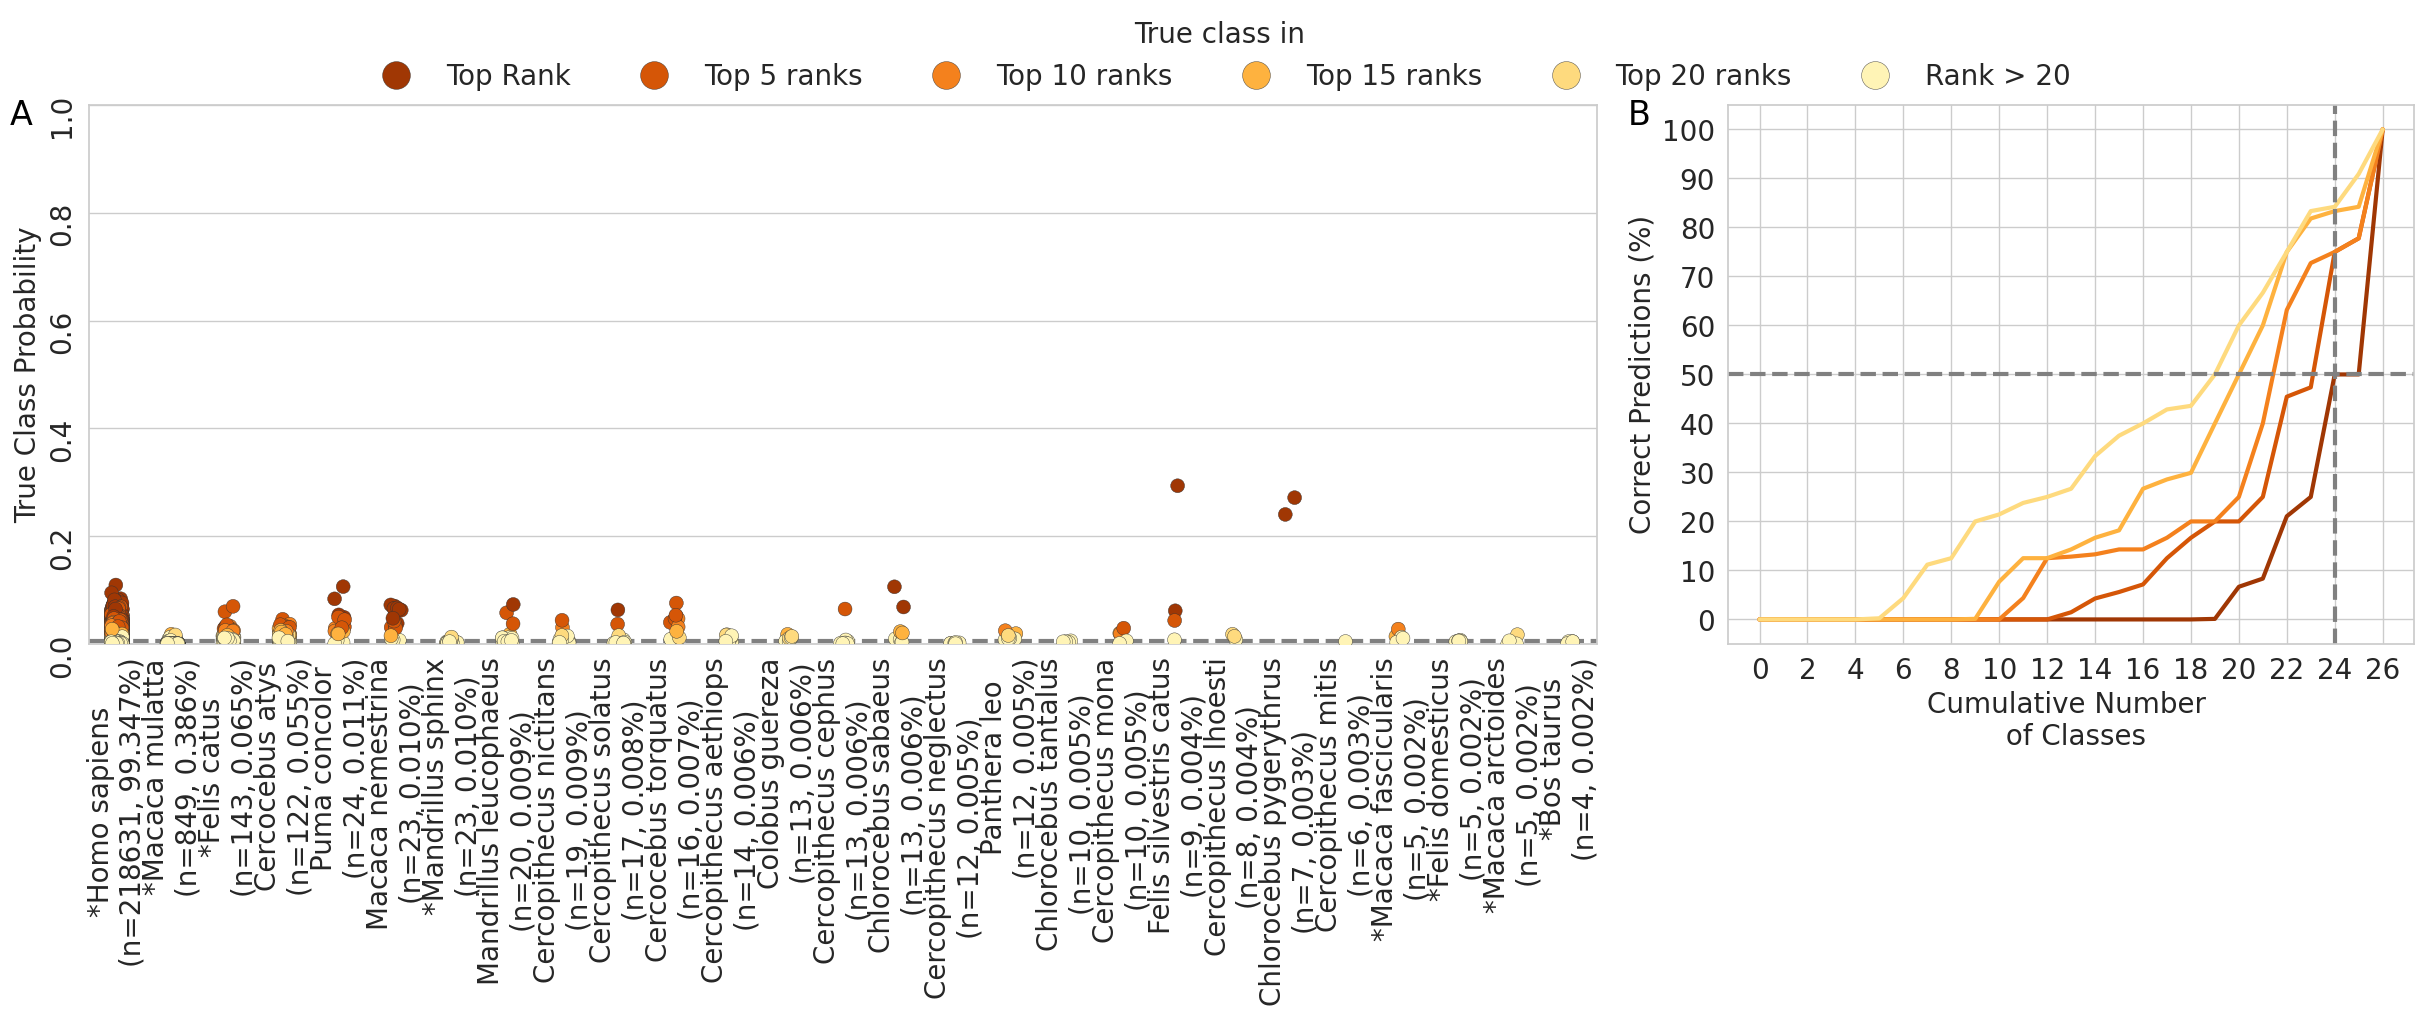

In [44]:
random_predictor_167way = 1/167
lineplot_df = plot_probability_distribution_new(class_prob_df_167way, output_file_path=os.path.join(os.getcwd(), "..", "..", "..", f"output/visualization/temp_new/idv_fsl_167way_stripplot_lineplot.png"))

In [34]:
lineplot_df[(lineplot_df["percent"] >= 50) & (lineplot_df["y_true_rank_bin"] == "Top Rank")]

,index,class,y_true_rank_bin,proportion,percent
24,24,"Felis silvestris catus\n(n=9, 0.004%)",Top Rank,0.5,50.0
25,25,"Macaca nemestrina\n(n=23, 0.010%)",Top Rank,0.5,50.0
26,26,"Chlorocebus pygerythrus\n(n=7, 0.003%)",Top Rank,1.0,100.0


class_prob_df_hosts = ['*Homo sapiens\n(n=218631, 99.347%)', '*Macaca mulatta\n(n=849, 0.386%)', '*Felis catus\n(n=143, 0.065%)', 'Cercocebus atys\n(n=122, 0.055%)', 'Puma concolor\n(n=24, 0.011%)', 'Macaca nemestrina\n(n=23, 0.010%)', '*Mandrillus sphinx\n(n=23, 0.010%)', 'Mandrillus leucophaeus\n(n=20, 0.009%)', 'Cercopithecus nictitans\n(n=19, 0.009%)', 'Cercopithecus solatus\n(n=17, 0.008%)', 'Cercocebus torquatus\n(n=16, 0.007%)', 'Cercopithecus aethiops\n(n=14, 0.006%)', 'Cercopithecus cephus\n(n=13, 0.006%)', 'Chlorocebus sabaeus\n(n=13, 0.006%)', 'Colobus guereza\n(n=13, 0.006%)', 'Panthera leo\n(n=12, 0.005%)', 'Cercopithecus neglectus\n(n=12, 0.005%)', 'Cercopithecus mona\n(n=10, 0.005%)', 'Chlorocebus tantalus\n(n=10, 0.005%)', 'Felis silvestris catus\n(n=9, 0.004%)', 'Cercopithecus lhoesti\n(n=8, 0.004%)', 'Chlorocebus pygerythrus\n(n=7, 0.003%)', 'Cercopithecus mitis\n(n=6, 0.003%)', '*Felis domesticus\n(n=5, 0.002%)', '*Macaca arctoides\n(n=5, 0.002%)', '*Macaca fascicula

<Figure size 432x288 with 0 Axes>

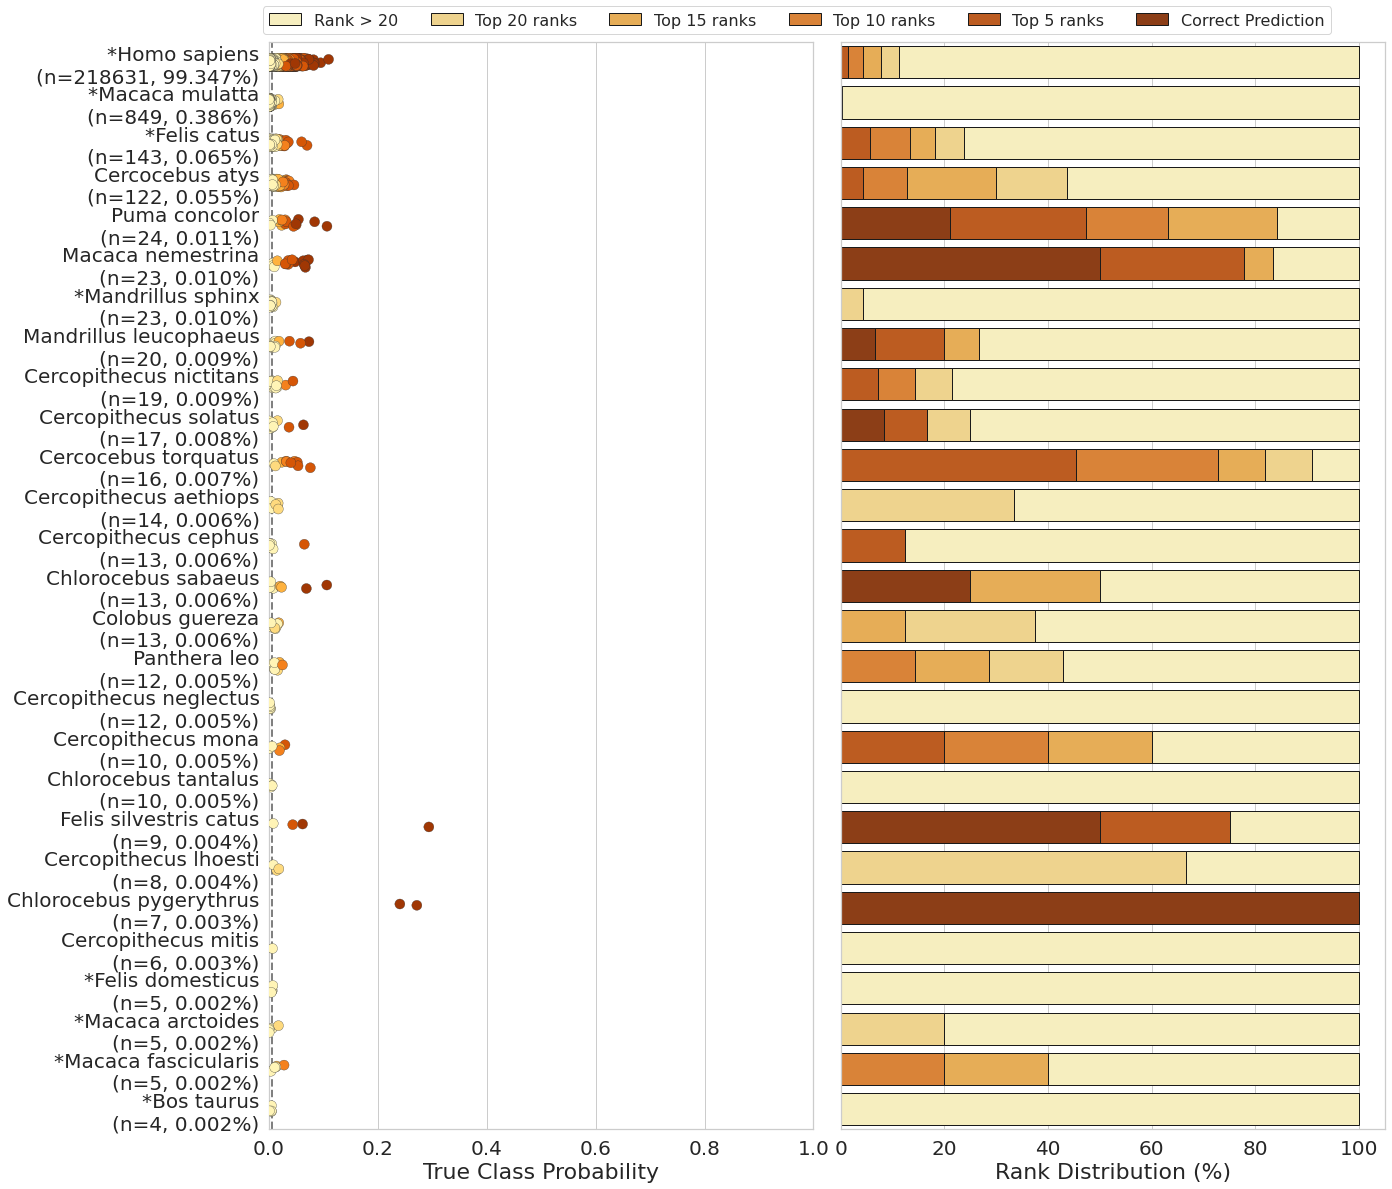

In [36]:
plot_probability_distribution(class_prob_df, random_predictor, idv_seen_hosts, idv_unseen_hosts, output_file_path = os.path.join(os.getcwd(),  "..", "..", "..", f"output/visualization/temp_new/idv_fsl_167way.png"))